<a href="https://colab.research.google.com/github/Pranjali012/Online-Fraud-Detection/blob/main/Online_Fraud_Detection_in_online_payments_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
data = pd.read_csv("/content/drive/MyDrive/Online fraud detection.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [4]:
print(data.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [5]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

In [6]:
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [7]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [8]:
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [11]:
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
dt= DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
print(dt.score(xtest, ytest))

0.999746959585831


In [15]:
y_pred_dt= dt.predict(xtest)
cm = confusion_matrix(ytest, y_pred_dt)
print(cm)

[[   727     90]
 [    71 635374]]


In [27]:
dt_score = accuracy_score(ytest, y_pred_dt)
print('Decision Tree Accuracy: ', str(dt_score))

Decision Tree Accuracy:  0.999746959585831


In [12]:
features = np.array([[4, 5000.60, 3000.60, 0.0]])
print(dt.predict(features))

['No Fraud']


In [13]:
from sklearn.neighbors import KNeighborsClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(xtrain, ytrain)
print(knn.score(xtest, ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9996652322470931


In [17]:
y_pred_knn= knn.predict(xtest)
cm = confusion_matrix(ytest, y_pred_knn)
print(cm)

[[   750     67]
 [   146 635299]]


In [20]:
knn_score = accuracy_score(ytest, y_pred_knn)
print('KNN Accuracy: ', str(knn_score))

KNN Accuracy:  0.9996652322470931


In [19]:
features = np.array([[4, 5000.60, 3000.60, 0.0]])
print(knn.predict(features))

['No Fraud']


In [23]:
from sklearn.naive_bayes import GaussianNB
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
nb= GaussianNB()
nb.fit(xtrain, ytrain)
print(nb.score(xtest, ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.994422109131144


In [24]:
y_pred_nb= nb.predict(xtest)
cm = confusion_matrix(ytest, y_pred_nb)
print(cm)

[[   123    694]
 [  2855 632590]]


In [25]:
np_score = accuracy_score(ytest, y_pred_nb)
print('Naive Bayes Accuracy: ', str(np_score))

Naive Bayes Accuracy:  0.994422109131144


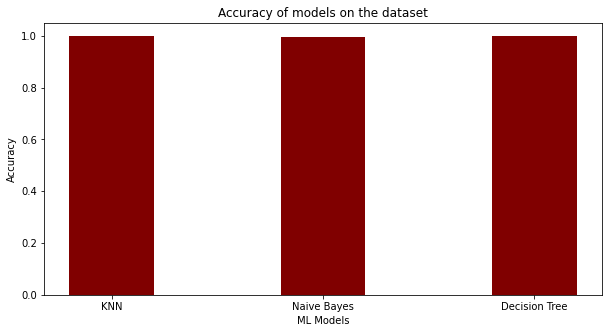

In [28]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'KNN':knn_score, 'Naive Bayes':np_score, 'Decision Tree':dt_score}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("ML Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of models on the dataset")
plt.show()